<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 '1_customers_dataset.csv',
 'sales.csv',
 'sample-sales-data.csv',
 'lead_conversion.csv',
 'scanner_data.csv',
 'online_retail_II.xlsx',
 'mall_customers.csv',
 'sales_data_with_stores.csv',
 'groceries.csv',
 'ab_experiment.csv',
 'cookie_cats.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_order_payments_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'match_result_test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'online_retail.xlsx',
 'test.csv',
 'app_wau.csv',
 'sales_vs_discount.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'bz_data_analyis.csv',
 '1_orders_dataset.csv',
 'ecommerce-data.csv',
 'sample_data']

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
cnt = pd.melt(df, id_vars = ['userid','version','sum_gamerounds'], var_name = 'retention', value_name = 'result')
cnt = cnt.groupby(['version','retention','result'])['userid'].count().reset_index(name = 'cnt')
cnt = cnt[cnt['result'] == True]
cnt

,version,retention,result,cnt
1,gate_30,retention_1,True,20034
3,gate_30,retention_7,True,8502
5,gate_40,retention_1,True,20119
7,gate_40,retention_7,True,8279


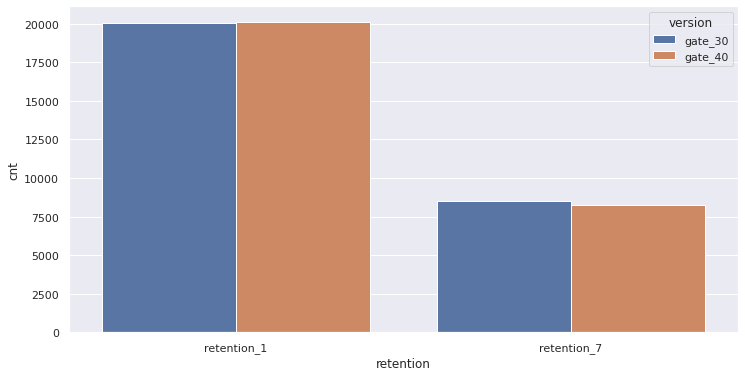

In [5]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.barplot(data = cnt, x = 'retention', y = 'cnt', hue = 'version')
plt.show()

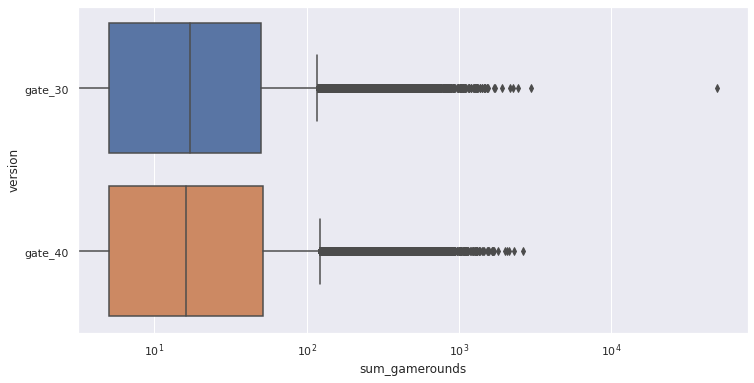

In [6]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [7]:
df = df[df['sum_gamerounds'] <= 10000]

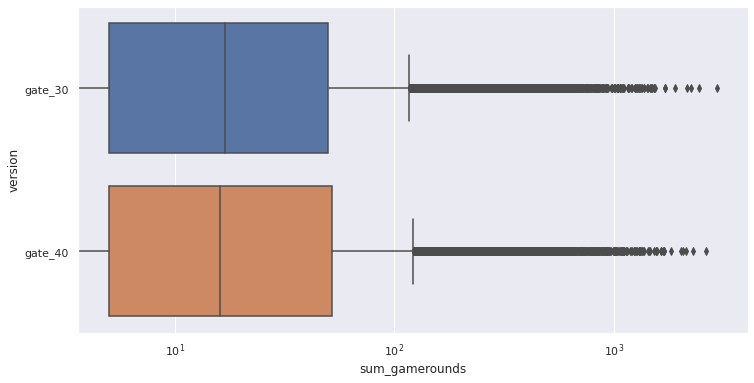

In [8]:
sns.set(rc = {'figure.figsize':[12,6]})
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

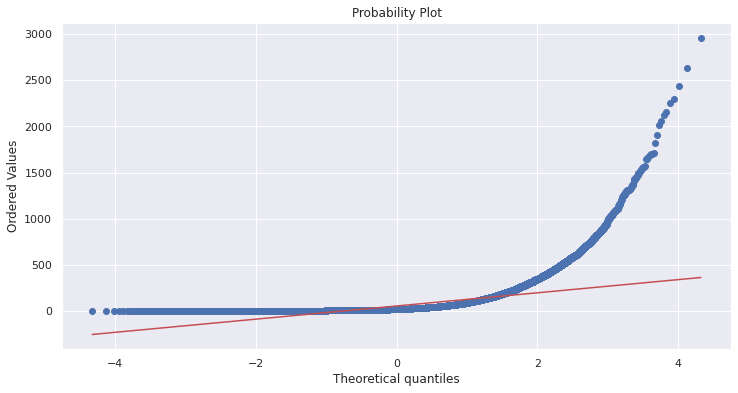

In [9]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [10]:
stat, p = stats.chisquare(df['sum_gamerounds'])
print(str(round(stat, 2)), '\n', str(round(p, 2)))

18528909.99 
 0.0


In [11]:
res = stats.anderson(df['sum_gamerounds'])
res

AndersonResult(statistic=13369.548966017013, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [12]:
res2 = zip(res.critical_values, res.significance_level)

In [13]:
[f'Probably Gaussian : critical value is {crit}, significance level is {sig}'
 if crit > sig
 else f'Probably not Gaussian : critical value is {crit}, significance level is {sig}'
 for crit, sig in res2
]

['Probably not Gaussian : critical value is 0.576, significance level is 15.0',
 'Probably not Gaussian : critical value is 0.656, significance level is 10.0',
 'Probably not Gaussian : critical value is 0.787, significance level is 5.0',
 'Probably not Gaussian : critical value is 0.918, significance level is 2.5',
 'Probably Gaussian : critical value is 1.092, significance level is 1.0']

In [15]:
n = 1000
boots = pd.DataFrame(
    [df.sample(frac = .1, replace = True).groupby(['version'])['sum_gamerounds'].mean() for i in range(n)]
)
boots.head()

version,gate_30,gate_40
sum_gamerounds,51.551546,51.241167
sum_gamerounds,53.898757,50.065520
sum_gamerounds,52.535730,52.182972
sum_gamerounds,50.809011,54.846204
sum_gamerounds,51.053659,51.286760


<AxesSubplot:ylabel='Density'>

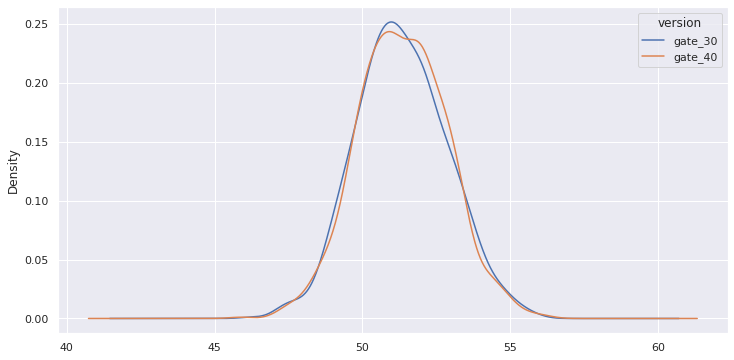

In [16]:
boots.plot.kde()

In [17]:
diff = boots['gate_30'] - boots['gate_40']
len(diff[diff > 0])/n

0.471

In [18]:
z_mean = np.mean(boots['gate_30']) - np.mean(boots['gate_40'])
z_sigma = np.sqrt(
    np.var(boots['gate_30'])/n + np.var(boots['gate_40'])/n
)
alpha = .5
ci_diff = [z_mean - norm.ppf(1-alpha/2)*z_sigma, z_mean + norm.ppf(1-alpha/2)*z_sigma]

In [20]:
print(f'Z Mean : {round(z_mean,4)}')
print(f'Z Sigma : {round(z_sigma, 4)}')
print(f'CI Difference : {round(ci_diff[0], 4)}, {round(ci_diff[1], 4)}')

Z Mean : -0.0238
Z Sigma : 0.0678
CI Difference : -0.0696, 0.0219


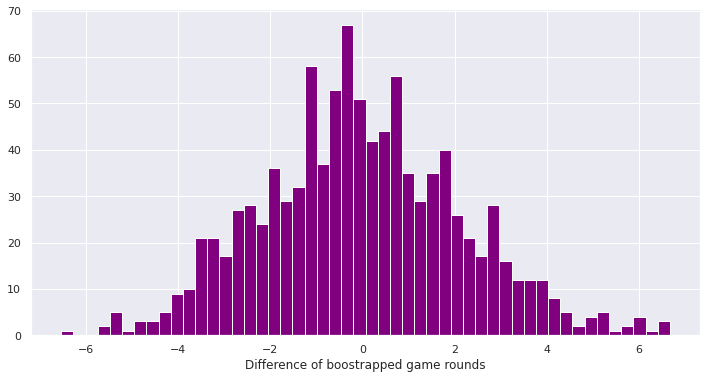

In [21]:
plt.hist(diff, bins = 50, color = 'purple')
plt.xlabel('Difference of boostrapped game rounds')
plt.show()

# Iterators

In [22]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [23]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}